In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Capstone Project
To tie most of what we have learned together in this tutorial, let's analyse the *world-happiness* dataset.

Below are the tasks that need to be done.

## Loading data
load the data in `data/world-happiness/{year}.csv` for each year 

to each a column 'data_year' to keep track of the source year

In [2]:
# insert solution here

In [3]:
dfs = {}
for year in (2015, 2016, 2017):
    i_df = pd.read_csv(f'../data/world-happiness/{year}.csv')
    i_df['data_year'] = year
    print(i_df.columns)
    dfs[year] = i_df

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'data_year'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'data_year'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'data_year'],
      dtype='object')


## Correcting column names
correct the column names in the 2017 data so to be consistent with the previous years

In [4]:
# insert solution here

In [5]:
dfs[2017].rename(columns={
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 
    'Health..Life.Expectancy.': 'Health (Life Expectancy)', 
    'Trust..Government.Corruption.': 'Trust (Government Corruption)'
}, inplace=True)
dfs[2017].columns = dfs[2017].columns.str.replace('.', ' ')

In [6]:
#checking
print(dfs[2015].columns)
print(dfs[2017].columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'data_year'],
      dtype='object')
Index(['Country', 'Happiness Rank', 'Happiness Score', 'Whisker high',
       'Whisker low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual', 'data_year'],
      dtype='object')


# Standardize Country names
correct the names in all DataFrames to common ones.

**HINT**: you can use the following correction dictionary or create your own
```python
correcting_country_names = {
    'Taiwan': 'Taiwan Province of China',
    'Hong Kong': 'Hong Kong S.A.R., China',
}
```

In [7]:
# insert solution here

In [8]:
# this is how 'correcting_country_names' was created
def compare_series(s1, s2, s2_name='s2'):
    set1, set2 = set(s1), set(s2)
    missing_in_s1 = sorted(set2 - set1)
    missing_in_s2 = sorted(set1 - set2)
    print(f'extra_in_{s2_name}   : {missing_in_s1}\nmissing_in_{s2_name} : {missing_in_s2}')
    
compare_series(s1=dfs[2017]['Country'], s2=dfs[2015]['Country'], s2_name='2015')
compare_series(s1=dfs[2017]['Country'], s2=dfs[2016]['Country'], s2_name='2016')

extra_in_2015   : ['Comoros', 'Djibouti', 'Hong Kong', 'Laos', 'Oman', 'Somaliland region', 'Suriname', 'Swaziland', 'Taiwan']
missing_in_2015 : ['Belize', 'Hong Kong S.A.R., China', 'Namibia', 'Somalia', 'South Sudan', 'Taiwan Province of China']
extra_in_2016   : ['Comoros', 'Hong Kong', 'Laos', 'Puerto Rico', 'Somaliland Region', 'Suriname', 'Taiwan']
missing_in_2016 : ['Central African Republic', 'Hong Kong S.A.R., China', 'Lesotho', 'Mozambique', 'Taiwan Province of China']


In [9]:
correcting_country_names = {
    'Taiwan': 'Taiwan Province of China',
    'Hong Kong': 'Hong Kong S.A.R., China',
}

for k,v in correcting_country_names.items():
    dfs[2015]['Country'].replace(k,v, inplace=True)
    dfs[2016]['Country'].replace(k,v, inplace=True)
    dfs[2017]['Country'].replace(k,v, inplace=True)
    
compare_series(s1=dfs[2017]['Country'], s2=dfs[2015]['Country'], s2_name='2015')
compare_series(s1=dfs[2017]['Country'], s2=dfs[2016]['Country'], s2_name='2016')

extra_in_2015   : ['Comoros', 'Djibouti', 'Laos', 'Oman', 'Somaliland region', 'Suriname', 'Swaziland']
missing_in_2015 : ['Belize', 'Namibia', 'Somalia', 'South Sudan']
extra_in_2016   : ['Comoros', 'Laos', 'Puerto Rico', 'Somaliland Region', 'Suriname']
missing_in_2016 : ['Central African Republic', 'Lesotho', 'Mozambique']


## Remove Inconsistent Countries 
remove the rows of the countries that are not in all datasets

In [10]:
print('starting with n_rows: ', [df.shape[0] for df in dfs.values()])

list_of_unique_country_names = [set(i['Country']) for i in dfs.values()]
common_country_names = set.intersection(*list_of_unique_country_names)

trimmed_dfs = {year: df[df['Country'].isin(common_country_names)].copy() for year, df in dfs.items()}

print('trimmed to n_rows: ', [df.shape[0] for df in trimmed_dfs.values()])

starting with n_rows:  [158, 157, 155]
trimmed to n_rows:  [148, 148, 148]


## Add Region to 2017 data
add Region column to the 2017 data by using the same mapping of the previous years 

In [11]:
mapping_2015 = {k:v for k,v in trimmed_dfs[2015].apply(lambda row: (row['Country'],row['Region']), axis=1)}
mapping_2016 = {k:v for k,v in trimmed_dfs[2016].apply(lambda row: (row['Country'],row['Region']), axis=1)}

mapping_2015 == mapping_2016  # checking they match

True

In [12]:
trimmed_dfs[2017]['Region'] = trimmed_dfs[2017]['Country'].apply(mapping_2015.get)
trimmed_dfs[2017].head(3)

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,data_year,Region
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017,Western Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017,Western Europe
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017,Western Europe


## Remove Inconsistent Columns 
remove the columns that are not in all datasets

In [13]:
list_of_unique_columns = [set(df.columns) for df in trimmed_dfs.values()]
common_columns = sorted(set.intersection(*list_of_unique_columns))

common_columns

['Country',
 'Dystopia Residual',
 'Economy (GDP per Capita)',
 'Family',
 'Freedom',
 'Generosity',
 'Happiness Rank',
 'Happiness Score',
 'Health (Life Expectancy)',
 'Region',
 'Trust (Government Corruption)',
 'data_year']

In [14]:
trimmed_dfs = {year: df[common_columns].copy() for (year,df) in trimmed_dfs.items()}

# check columns match
for k,v in trimmed_dfs.items():
    print(k, sorted(v.columns) == common_columns)

2015 True
2016 True
2017 True


## Combine All DataFrames
now that all three dataframes have been standardized, we can combine them (vertically)

In [15]:
df = pd.concat(trimmed_dfs.values(), axis='index')
df.head()

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Region,Trust (Government Corruption),data_year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,Western Europe,0.41978,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,Western Europe,0.14145,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,Western Europe,0.48357,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,Western Europe,0.36503,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,North America,0.32957,2015


## Analysing the data
Use the cleaned dataset to answer the following questions/tasks.

Feel free to explore more and answer your own questions.

### Which country is consistely more Generous? which least Generous?

In [16]:
display('most:', df.sort_values('Generosity').tail(3))  # Myanmar
display('least:', df.sort_values('Generosity').head(3))  # Greece

'most:'

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Region,Trust (Government Corruption),data_year
128,Myanmar,1.41805,0.271080,0.709050,0.440170,0.795880,129,4.307,0.482460,Southeastern Asia,0.190340,2015
118,Myanmar,1.50655,0.341120,0.699810,0.426920,0.819710,119,4.395,0.398800,Southeastern Asia,0.202430,2016
113,Myanmar,1.11529,0.367111,1.123236,0.514492,0.838075,114,4.545,0.397523,Southeastern Asia,0.188816,2017


'least:'

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Region,Trust (Government Corruption),data_year
101,Greece,1.801010,1.154060,0.929330,0.076990,0.0,102,4.857,0.882130,Western Europe,0.01397,2015
86,Greece,1.749222,1.289487,1.239415,0.095731,0.0,87,5.227,0.810199,Western Europe,0.04329,2017
98,Greece,2.129440,1.248860,0.754730,0.058220,0.0,99,5.033,0.800290,Western Europe,0.04127,2016


### Which country has seen the biggest drop in Happiness Score within 1 year? which the biggest increase?

In [17]:
pivotted = df.pivot_table(index='Country', columns='data_year', values='Happiness Score')
display(pivotted.head())

happiness_diffs = pivotted.diff(axis=1).stack()
display(happiness_diffs.head())

print('\n'+'='*80)
print('biggest drop:', happiness_diffs.idxmin(), ': ', happiness_diffs.min())
print('biggest increase:', happiness_diffs.idxmax(), ': ', happiness_diffs.max())

data_year,2015,2016,2017
Country,,,
Afghanistan,3.575,3.360,3.794
Albania,4.959,4.655,4.644
Algeria,5.605,6.355,5.872
Angola,4.033,3.866,3.795
Argentina,6.574,6.650,6.599


Country      data_year
Afghanistan  2016        -0.215
             2017         0.434
Albania      2016        -0.304
             2017        -0.011
Algeria      2016         0.750
dtype: float64


biggest drop: ('Liberia', 2016) :  -0.9490000000000007
biggest increase: ('Algeria', 2016) :  0.75


### Which Region, on average, has seen the biggest drop in Happiness Score within 1 year? which the biggest increase?

In [18]:
pivotted = df.pivot_table(index='Region', columns='data_year', values='Happiness Score', aggfunc='mean')
display(pivotted.head())

happiness_diffs = pivotted.diff(axis=1).stack()
display(happiness_diffs.head())

print('\n'+'='*80)
print('biggest drop:', happiness_diffs.idxmin(), ': ', happiness_diffs.min())
print('biggest increase:', happiness_diffs.idxmax(), ': ', happiness_diffs.max())

data_year,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.646667
Latin America and Caribbean,6.138762,6.056095,5.957905
Middle East and Northern Africa,5.330789,5.386053,5.369684


Region                      data_year
Australia and New Zealand   2016         0.038500
                            2017        -0.024500
Central and Eastern Europe  2016         0.037759
                            2017         0.039241
Eastern Asia                2016        -0.002000
dtype: float64


biggest drop: ('North America', 2017) :  -0.09949999237060414
biggest increase: ('Southern Asia', 2017) :  0.06514284706115614


### Which variables are most/least correlated with *Happiness Score*? make a scatterplot of them against *Happiness Score*.
NOTE: remove *Happiness Rank* 

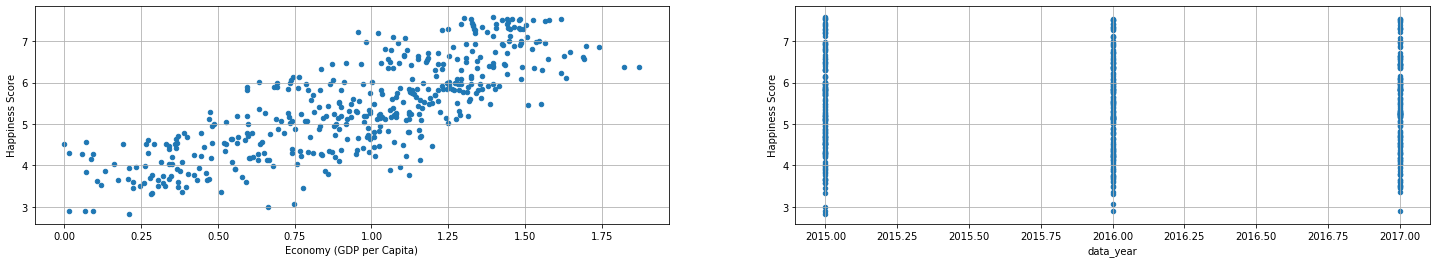

In [19]:
corr = df.corr()['Happiness Score'].drop(['Happiness Score','Happiness Rank'])

fig, axes = plt.subplots(1,2)
fig.set_size_inches(25,4)
df.plot.scatter(corr.idxmax(), 'Happiness Score', grid=True, ax=axes[0])
df.plot.scatter(corr.idxmin(), 'Happiness Score', grid=True, ax=axes[1])

### Taking the data average, is it clear if we getting happier or sadder? Which was the saddest year?

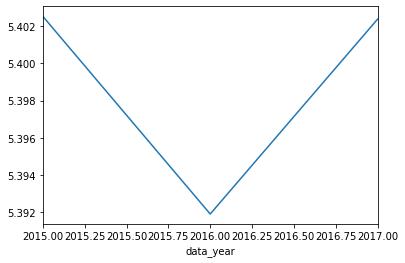

In [20]:
yearly_mean = df.groupby('data_year')['Happiness Score'].mean()
yearly_mean.plot()

# not clear
# 2016 saddest